In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as scs
import scipy.stats as sct
from scipy.stats import binom

import statsmodels.api as sm
import statsmodels.formula.api as smf

import japanize_matplotlib

%matplotlib inline

# 7.1 例題；GLMでは説明出来ないカウントデータ

           N           y           x          id
count  100.0  100.000000  100.000000  100.000000
mean     8.0    3.810000    4.000000   50.500000
std      0.0    3.070534    1.421338   29.011492
min      8.0    0.000000    2.000000    1.000000
25%      8.0    1.000000    3.000000   25.750000
50%      8.0    3.000000    4.000000   50.500000
75%      8.0    7.000000    5.000000   75.250000
max      8.0    8.000000    6.000000  100.000000


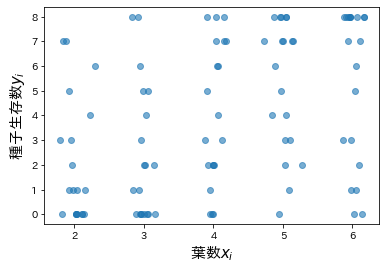

'R\n# plot(jitter(d$x,0.5), d$y)\n'

In [12]:
#データの読み込み、情報取得
df = pd.read_csv("data7.csv")
print(df.describe())
"""R
d <- read.csv("data7.csv")
summary(d)
"""

# プロットの作成（プロットが重なるのを防ぐために正規分布のズレを加えている）
jitter = np.random.normal(loc=0,scale=0.1,size=100)

plt.scatter(df['x'] + jitter, df['y'],alpha=0.6)
plt.xlabel('葉数$x_i$',fontsize=15)
plt.ylabel('種子生存数$y_i$',fontsize=15)
plt.show()

"""R
# plot(jitter(d$x,0.5), d$y)
"""

In [13]:
# GLMを当てはめてみる。
model = smf.glm('y + I(N-y)~ x',data=df,family=sm.families.Binomial())
result = model.fit()
print(result.summary())

"""R
fit <- glm(cbind(y, N - y) ~ x, data = d, family = binomial)
summary(fit)
"""

                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -322.80
Date:                Sun, 27 Feb 2022   Deviance:                       513.84
Time:                        12:04:57   Pearson chi2:                     428.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.6078
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1487      0.237     -9.057      0.0

'R\nfit <- glm(cbind(y, N - y) ~ x, data = d, family = binomial)\nsummary(fit)\n'

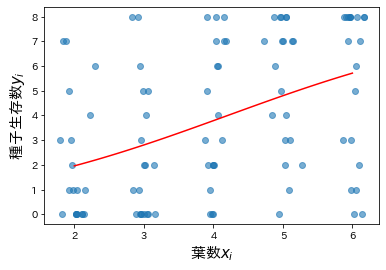

'R\nlogistic <- function(x) 1 / (1 + exp(- (-2.1487 + 0.5104 * x)))\nx <- seq(2 ,6, 0.1)\nplot(jitter(d$x,0.5), d$y)\npoints(x,logistic(x)*8, type = "l")\n'

In [67]:
# 結果をプロットしてみる
df_predict = pd.DataFrame()
df_predict["x"] = [i/10 for i in range(20, 61)]
df_predict["y_pred"] = result.predict(df_predict)*8

plt.scatter(df['x']+jitter,df['y'],alpha=0.6)
plt.plot(df_predict['x'],df_predict["y_pred"],color='red')
plt.xlabel('葉数$x_i$',fontsize=15)
plt.ylabel('種子生存数$y_i$',fontsize=15)
plt.show()

"""R
logistic <- function(x) 1 / (1 + exp(- (-2.1487 + 0.5104 * x)))
x <- seq(2 ,6, 0.1)
plot(jitter(d$x,0.5), d$y)
points(x,logistic(x)*8, type = "l")
"""

# 7.2 過分散と個体差

0    3
1    1
2    4
3    2
4    1
5    1
6    2
7    3
8    3
Name: y, dtype: int64
#####
平均: 4.05
分散: 8.365789473684211
#####


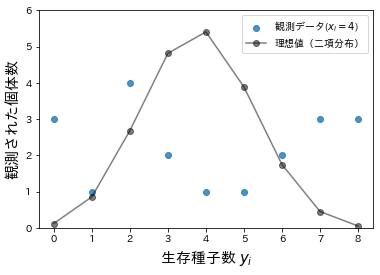

'R\nd4 <- d[d$x==4,]\n\nc(mean(d4$x), var(d4$y))\n\nhist(d_4$y)\n'

In [106]:
# X_i=4の個体のうち、生存数がy_iであった個体を数える。
df_4 = df.loc[df['x']==4] 
count_data = df_4['y'].value_counts()
print(count_data.sort_index())
print('#####')

# X_i=4のデータの平均と分散を調べる
print('平均:', df_4['y'].mean())
print('分散:', df_4['y'].var())
print('#####')

# x=4での種子の生存数をプロットしてみる
plt.scatter(count_data.index, count_data.values,alpha=0.8,label='観測データ($x_i=4$)')

# GLMから見積もられたX_i=4 の時の二項分布を作成する。
q = df_predict.loc[df_predict['x']==4.0,'y_pred'].values[0] / 8
yi_list = np.arange(0, 9)
plt.plot(yi_list, binom.pmf(yi_list, 8, q) * len(df_4),marker='o',color='black',alpha=0.5,label='理想値（二項分布）')

plt.ylim(0,6)
plt.xlabel('生存種子数 $y_i$',fontsize=15)
plt.ylabel('観測された個体数',fontsize=15)
plt.legend()
plt.show()

"""R
d4 <- d[d$x==4,]

c(mean(d4$x), var(d4$y))

hist(d_4$y)
"""

## 7.4 一般化線形混合モデルの最尤推定


In [108]:
# GLMMのパラメーターを推定する。
# pythonにはGLMMを実行するパッケージがないらしい
"""R
library(glmmML)
fit = glmmML(cbind(y, N-y)~x, data=d, family=binomial, cluster=id)
summary(fit)

# 結果をプロットしてみる
logistic_glmm <- function(x) 1 / (1 + exp(- (-4.190 + 1.005 * x)))
x <- seq(2 ,6, 0.1)
plot(jitter(d$x,0.5), d$y)
points(x,logistic_glmm(x)*8, type = "l")
"""

'R\nlibrary(glmmML)\nfit = glmmML(cbind(y, N-y)~x, data=d, family=binomial, cluster=id)\nsummary(fit)\n\n# 結果をプロットしてみる\nlogistic_glmm <- function(x) 1 / (1 + exp(- (-4.190 + 1.005 * x)))\nx <- seq(2 ,6, 0.1)\nplot(jitter(d$x,0.5), d$y)\npoints(x,logistic_glmm(x)*8, type = "l")\n'

## 参考
- https://github.com/takitsuba/midoribon/blob/master/Chap7/Chap7.ipynb
- https://qiita.com/kenmatsu4/items/da59a6fccde0cee4ef49